In [8]:
library(tidyverse)
players<- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


**UBC DSCI100 individual report**

-**Author:** Yunan Deng

-**Student number:** 67274323

**-Data description**
-


**-players.csv description**
-
- **number of observation is 196, and number of variables are 7.**

**The name of variables are "experience", "subscribe", "hashedEmail","played_hours","name","gender"and"Age"**

- **experience:** character, indicates the players experience level.

- **subscribe:** logical, indicates whether players subcribe newsletters.(True or false)

- **hashedEmail:** character, the users hashed email number.

- **played_hours:** numerical, the number of time player play the game.

- **name:** character,the username of players.

- **gender:** character, the gender of players.

- **Age:** numerical, the age of players.


**-summary statistics(2 decimal)-mean**
 
**age**

- The average age of players is 21.14 year-old.

- The median age of players is 19 year-old.

- The range of players' age in the game is from 9 years old to 58 years old.

**played_hours**

- The average played hours of players is 5.85 hours.

- The median play time of players is 0.1 hours. (affected by "0")

- The range of play time of players from 0 to 223.1 hours

**-Potential issues**

- **N/A values:**
There are all valid cell in each columns variable, no N/A values appear, which means the average values for **Age** and **played_hours** are correct and not affected by the N/A values in Age and played_hours columns.

- **unbanlanced categoricals:** the number of male players is significant higher than other genders, which is nearly three times for females players and 5-10 times for other gender identities. This imbanlance categoricals collecting will cause bias in the prediction. Additionally, most players are Amateur level, which nearly two times number for Beginer level, indicating another potential imbanlance in the experience level distribution.

- **small sample size:** the number of rows only 196, which means only 196 players information at here. The sample size is really small, limiting the generalization for final conclusion and prediction.

- **extrem value:** the minimum value of played_hours appears "0", indicating that some players have 0 play hours, which may indicate they registered but never played. This maybe will affect the average value for played_houres lower then actually.

**-How the data were collect**

- 

In [9]:
number_rows <- nrow(players)
number_rows
number_columns <- ncol(players)
number_columns

[1] 196

[1] 7

In [10]:
statical_value_Age<-players|>summarise(
    mean_age = round(mean(Age,na.rm = TRUE), 2),
    median_age = round(median(Age,na.rm = TRUE), 2),
    min_age = round(min(Age,na.rm = TRUE), 2),
    max_age = round(max(Age,na.rm = TRUE), 2)
    
)
statical_value_Age

statical_value_played_hours<-players|>summarise(
    mean_played_hours =round(mean(played_hours,na.rm= TRUE),2),
    median_played_hours =round(median(played_hours,na.rm= TRUE),2),
    min_played_hours =round(min(played_hours,na.rm= TRUE),2),
    max_played_hours =round(max(played_hours,na.rm= TRUE),2)
)

statical_value_played_hours


mean_age,median_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>
21.14,19,9,58


mean_played_hours,median_played_hours,min_played_hours,max_played_hours
<dbl>,<dbl>,<dbl>,<dbl>
5.85,0.1,0,223.1


In [11]:
is.na(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [12]:
library(dplyr)
number_for_experience_level <- players|>
count(experience)
number_for_experience_level

number_for_gender <- players|>
count(gender)
number_for_gender

experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


**sessions.csv description**
- **total number of rows is 1535**

- **total number of variables is 5**

-**the name of varables are original_end_time, original_start_time, end_time, start_time, and hashedEmaile.**

- **original_end_time:** numeric, the original end time of player without translation to date/month/year/time.

- **original_start_time:** numeric, the original start time of player without translation to date/month/year/time.

- **end_time:** character, the end time of player.

- **start_time:** character,the start time of player.

- **hashedEmaile:** character, the users hashed email number.

-**summary statistics(2 decimal)**

- **original_end_time**

- the average original end time for each players we collect is 1.719201e+12.


- the median orginal end time is1.7192e+12.

- the range of players' original end time is from1.7124e+12	to 1.72733e+12.

- **original_start_time**

- the average original end time for each players we collect is 1.719196e+12.

- the median orginal end time is 1.71918e+12.

- the range of players' original end time is from 1.7124e+12 to 1.72734e+12.


- **pottential issue**

- no missing data

- There are a lot of **zero value**, which means the start time for players and ends time for players are same, the game duration is 0. The number is great(1104), which may affect the prediction. I think maybe is the static lagging problem.

In [13]:
number_rows_s <- nrow(sessions)
number_cols_s <- ncol(sessions)
number_rows_s
number_cols_s

[1] 1535

[1] 5

In [14]:
statical_value_original_start<-sessions|>summarise(
    mean_start = round(mean(original_start_time,na.rm = TRUE), 2),
    median_start = round(median(original_start_time,na.rm = TRUE), 2),
    min_start = round(min(original_start_time,na.rm = TRUE), 2),
    max_start = round(max(original_start_time,na.rm = TRUE), 2)
    
)
statical_value_original_start

statical_value_original_end<-sessions|>summarise(
    mean_end =round(mean(original_end_time,na.rm= TRUE),2),
    median_end =round(median(original_end_time,na.rm= TRUE),2),
    min_end =round(min(original_end_time,na.rm= TRUE),2),
    max_end =round(max(original_end_time,na.rm= TRUE),2)
)

statical_value_original_end

mean_start,median_start,min_start,max_start
<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,1.7192e+12,1.7124e+12,1.72733e+12


mean_end,median_end,min_end,max_end
<dbl>,<dbl>,<dbl>,<dbl>
1.719196e+12,1.71918e+12,1.7124e+12,1.72734e+12


In [15]:
is.na(sessions)

hashedEmail,start_time,end_time,original_start_time,original_end_time
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE


In [16]:
zero_issue <- sessions|>
filter(original_start_time == original_end_time)

count(zero_issue)




n
<int>
1104


**where we collect the data?**

- Our data are sourced from Minecraft werver which establied by one research group from UBC Department of Computer Science, leaded by the Professor Fanch Mood. They capture the actions of players and the informations.
- Some informations, like hasedEmail, are encrypted.
- Original_start_time and original_end_time can transfer a form we can directly reading, start_time and end_time.


-**Question**
-
-**broad question:** I choose the first question
- what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
- **specific question**
  
- Can played_hour and Age used to be predicted whether they subscrib the newsletter in players.csv?

--**response variable:** subscribe (whether the players subscribe the newsletter in the game)

--**explanatory variable:** played_hour and Age (the time of players played the game and the Age of players)

--**how the data will help you:**

- the **"players.csv"** file contains the response variable **"subscribe"**, which reflect whether the players subscribe the newsletter in the game, False represent not subscribe and True represent player subscribe the newsletter in the game.
**"players.csv"** also contains the explanator variables, **"Age"** and **"played_hour"**. These variables allow us to explore how engagement and Age relate to subscription behaviour.

--**planing to wrangle my data:**

   - Firstly, the data are selected only include subscribe, Age and played_hours, which we used to predict.
  
   - Secondly, variable types were adjusted. The subscribe use the as_factor function transfering to factor type and      played_hour and Age use as_numeric function transfering to the numeric.
  
   - Finally, the tidy dataset allows one observation per player.
  
   - After that, We can perform a KNN classification predicting subscribe based on player characteristics.

**Exploratory Data Analysis and Visualization**
-

- It canbe loaded into R and it contains some players information, such as experience level , the situation of subscribation, hashedEmail and played_hours, name, gender and Age.

In [3]:
library(tidyverse)
players <- read_csv("players.csv")
head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
tidy_players <- players |> 
select(subscribe,Age,played_hours)|>
  mutate(played_hours = as.numeric(played_hours),
   Age = as.numeric(Age),
   subscribe = as.factor(subscribe)
  )
tidy_players

subscribe,Age,played_hours
<fct>,<dbl>,<dbl>
TRUE,9,30.3
TRUE,17,3.8
FALSE,17,0.0
TRUE,21,0.7
TRUE,21,0.1
TRUE,17,0.0
TRUE,19,0.0
FALSE,21,0.0
TRUE,47,0.1


-**players.csv numeric mean**

- This figure below shows the computation of mean value for quantative variables in the players.csv

In [27]:
library(tidyverse)
statical_value<-players|>
   summarise( mean_age = round(mean(Age,na.rm = TRUE),2),
              mean_hours = round(mean(played_hours,na.rm=TRUE),2))
mean_table <- statical_value |>
  pivot_longer(
    cols = c(mean_age, mean_hours),
    names_to = "Variable",
    values_to = "Mean"
  ) |>
  as_tibble()
mean_table

Variable,Mean
<chr>,<dbl>
mean_age,21.14
mean_hours,5.85



- **exploratory visualizations of the data**
- the plot shows that the relationship between **played_hours** and **age**, separate by the **subscribe** status.

NULL

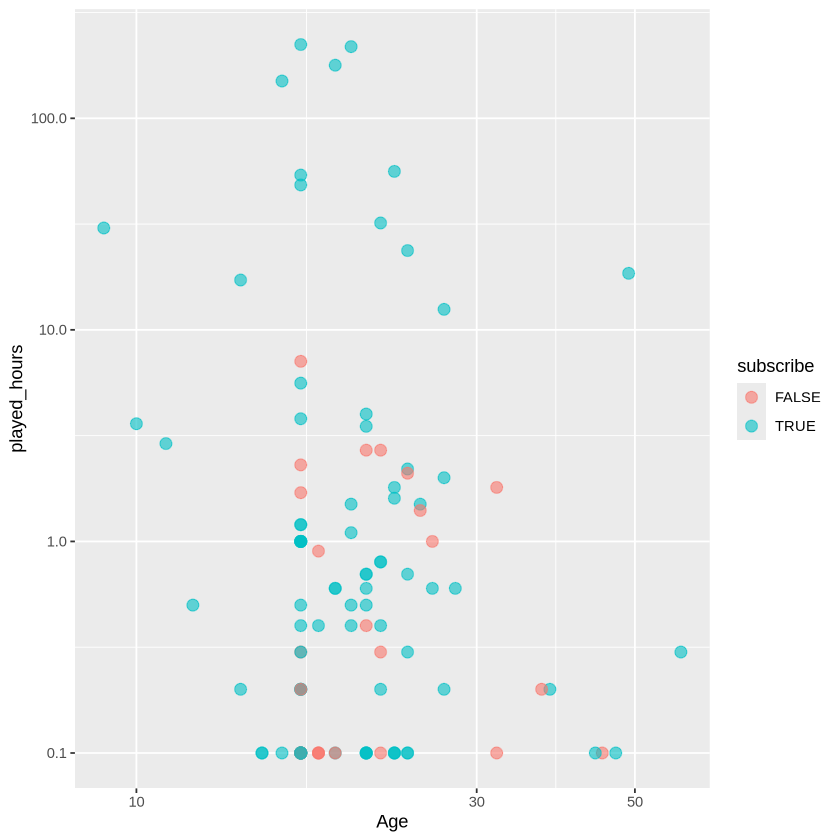

In [15]:
plot_1 <- tidy_players |> filter(played_hours > 0, !is.na(played_hours), !is.na(Age))|>
ggplot(aes(x= Age, y = played_hours, color = subscribe))+
geom_point(alpha=0.6,size=3)+
scale_y_log10() +
scale_x_log10()
labs(title = "Age vs Played Hours by Subscription Status",
    x= "the age of players in years",
    y= "the play time of players in hours",
    color= "subscription status")+
scale_color_manual(values= c("darkorange","steelblue"))+
theme(text= element_text(size = 12))
plot_1